## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
all_pharma_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
all_pharma_data.head(50)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

all_pharma_databyRegimen = all_pharma_data.groupby("Drug Regimen")

vMean = all_pharma_databyRegimen["Tumor Volume (mm3)"].mean()
vMedian = all_pharma_databyRegimen["Tumor Volume (mm3)"].median()
vVariance = all_pharma_databyRegimen["Tumor Volume (mm3)"].var()
vSTD = all_pharma_databyRegimen["Tumor Volume (mm3)"].std()
vSEM = all_pharma_databyRegimen["Tumor Volume (mm3)"].sem()

meanbyDrug = pd.DataFrame({
                            "Mean Tumor Volume": vMean,
                            "Median Tumor Volume": vMedian,
                            "Tumor Volume variance": vVariance,
                            "Tumor Volume STD": vSTD,
                            "Tumor Volume SEM": vSEM,
                        })
meanbyDrug = meanbyDrug.reset_index()
meanbyDrug.head()


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume variance,Tumor Volume STD,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

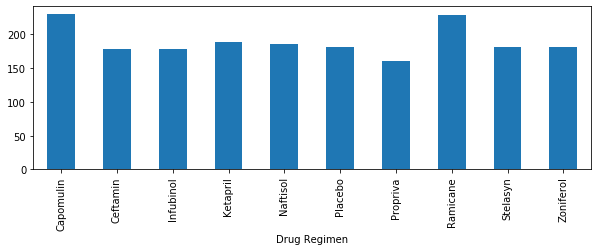

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_of_data_pts = all_pharma_data.groupby("Drug Regimen")["Drug Regimen"].count()
count_of_data_pts.plot(kind="bar", figsize=(10,3))
plt.show()

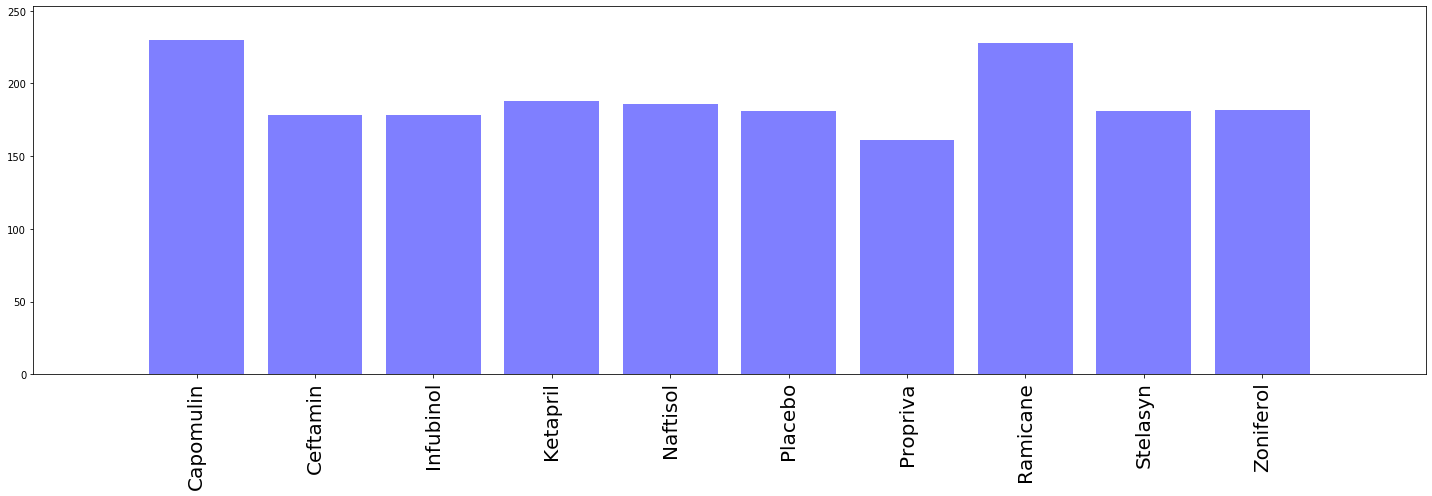

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count_of_data_pts = all_pharma_data.groupby("Drug Regimen")["Drug Regimen"].count() 
plt.figure(figsize=(20,7))
plt.bar(meanbyDrug["Drug Regimen"], count_of_data_pts, color='b', alpha=0.5, align="center")
plt.xticks(meanbyDrug["Drug Regimen"], meanbyDrug["Drug Regimen"], rotation='vertical', fontsize=20)

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.03)

plt.tight_layout()
plt.show()

## Pie plots

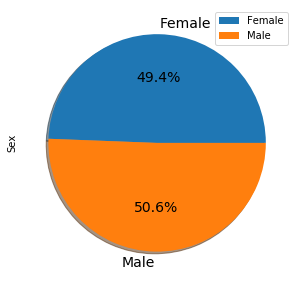

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_of_data_pts = all_pharma_data.groupby("Sex")["Sex"].count()
count_of_data_pts_df = pd.DataFrame({"Count":count_of_data_pts})
count_of_data_pts_df = count_of_data_pts_df.reset_index()

count_of_data_pts.plot(kind='pie', y = count_of_data_pts_df["Count"],  autopct='%1.1f%%', 
 startangle=0, shadow=True, labels=count_of_data_pts_df["Sex"], legend = True, fontsize=14,figsize=(10, 5))

#count_of_data_pts.plot.pie(y=count_of_data_pts, figsize=(5, 5),subplots=True)
plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_of_data_pts = all_pharma_data.groupby("Sex")["Mouse ID"].count()

x_axis = np.arange(0, len(count_of_data_pts))
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
labels = all_pharma_data["Sex"].unique()
explode = (0, 0.05)
plt.pie(count_of_data_pts, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [6]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment 
# regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively 
# determine if there are any potential outliers across all four treatment regimens.

all_pharma_data = all_pharma_data[all_pharma_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
all_pharma_databyRegimen = all_pharma_data.groupby(["Mouse ID","Drug Regimen"])["Timepoint","Tumor Volume (mm3)"].max()
all_pharma_databyRegimen = all_pharma_databyRegimen.reset_index()
all_pharma_databyRegimen = all_pharma_databyRegimen.sort_values('Tumor Volume (mm3)', ascending=False)

all_Pharma_Tumor_Volume = all_pharma_databyRegimen['Tumor Volume (mm3)']


# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = all_Pharma_Tumor_Volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of Tumor Volume is: 45.5098442875
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 14.420417467500002
The the median of Tumor Volume is: 46.860058175 
Values below 23.87921808625 could be outliers.
Values above 81.56088795625001 could be outliers.


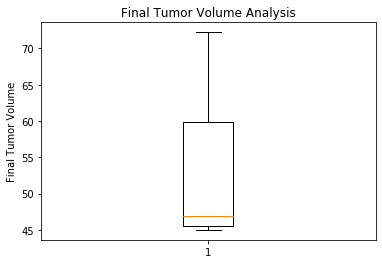

In [7]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Analysis')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(all_Pharma_Tumor_Volume)
plt.show()

## Line and scatter plots

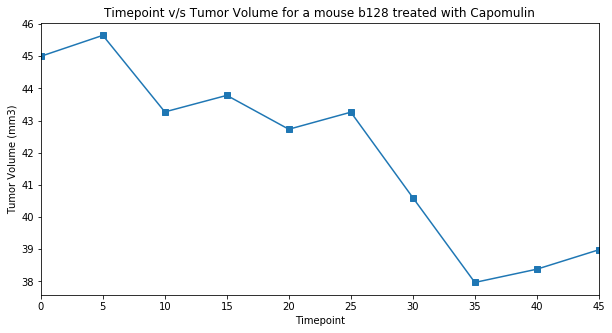

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

all_pharma_data_Capomulin = all_pharma_data[all_pharma_data["Drug Regimen"].isin(["Capomulin"])]
all_pharma_data_TP = all_pharma_data_Capomulin.groupby(['Mouse ID','Timepoint'])["Tumor Volume (mm3)"].sum()
# Make a variable called mouse_id and store a 'mouse id' in it
mouse_id = "b128"#input("Input Mouse ID ")
# Collect the data of the 'mouse_id' above
all_pharma_data_TP_Mouse = all_pharma_data_TP.loc[mouse_id]
all_pharma_data_TP_Mouse.plot(kind="line",marker='s', figsize=(10,5))
# Set a title for the chart
plt.title(f"Timepoint v/s Tumor Volume for a mouse {mouse_id} treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()



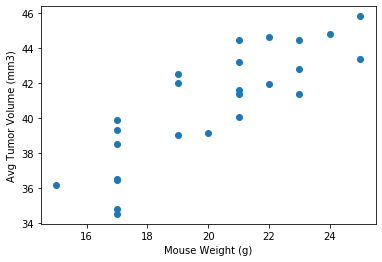

In [9]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Selected the columns and create a new dataset
allPharma_weight_data = pd.DataFrame(all_pharma_data_Capomulin, columns = ['Mouse ID','Tumor Volume (mm3)','Drug Regimen','Weight (g)'])

#Average tumor volume for the Capomulin regimen
allPharma_weight_data_drug = allPharma_weight_data.groupby(["Mouse ID","Weight (g)","Drug Regimen"])["Tumor Volume (mm3)"].mean()
allPharma_weight_data_drug = allPharma_weight_data_drug.reset_index()
#Plot scatter plot
plt.scatter(allPharma_weight_data_drug['Weight (g)'],allPharma_weight_data_drug['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

The correlation coefficient between both factors is 0.84
The regress_values as part of linear regression model is 0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64
The r-squared is: 0.8419363424694718


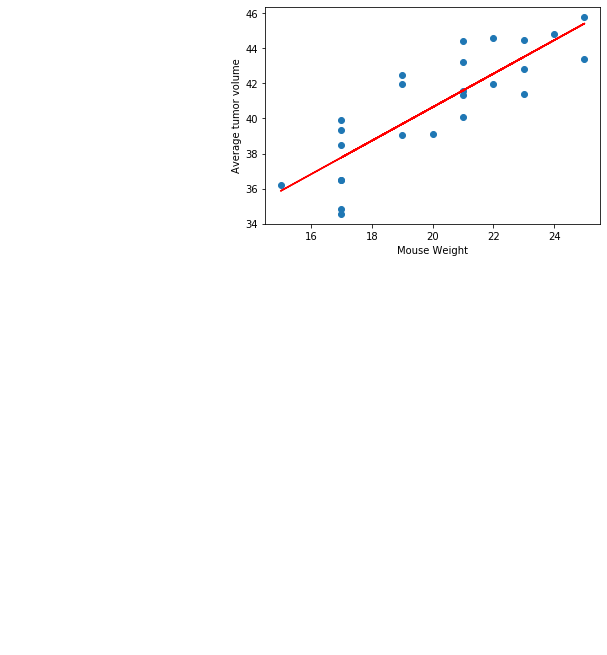

In [10]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
#and average tumor volume for the Capomulin regimen

mouse_weight = allPharma_weight_data_drug['Weight (g)']
average_tumor_volume = allPharma_weight_data_drug['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = allPharma_weight_data_drug['Weight (g)']
y_values = allPharma_weight_data_drug['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The regress_values as part of linear regression model is {regress_values}")

# Plot the linear regression model on top of the previous scatter plot.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average tumor volume')
print(f"The r-squared is: {rvalue}")
plt.show()